In [42]:
from __future__ import print_function, division
import numpy as np
#%matplotlib notebook
import matplotlib.pyplot as plt
import collections
import matplotlib.gridspec as gridspec # GRIDSPEC !


In [43]:
dir_base = './'
dir_mods = '/WASP-52_TASTEonly/'
dir_plot = '/emcee_plot/model_files/'

filename = 'WASP-52_TASTEonly'

def plots_in_grid():
    # Partially taken from here:
    # http://www.sc.eso.org/~bdias/pycoffee/codes/20160407/gridspec_demo.html

    gs = gridspec.GridSpec(2,1, height_ratios=[3.0,1.0])
    # Also make sure the margins and spacing are apropriate
    gs.update(left=0.2, right=0.95, bottom=0.08, top=0.93, wspace=0.02, hspace=0.03)

    ax_0 = plt.subplot(gs[0])
    ax_1 = plt.subplot(gs[1])

    # Adding minor ticks only to x axis
    from matplotlib.ticker import AutoMinorLocator
    minorLocator = AutoMinorLocator()
    ax_0.xaxis.set_minor_locator(minorLocator)
    ax_1.xaxis.set_minor_locator(minorLocator)

    ax_0.tick_params(labelbottom=False)    
    
    # Disabling the offset on top of the plot
    ax_0.ticklabel_format(useOffset=False)
    ax_1.ticklabel_format(useOffset=False)
    return ax_0, ax_1


LC_full = np.genfromtxt(dir_base + dir_mods + dir_plot + 'LCdata_full.dat', skip_header=1)
LC_modb = np.genfromtxt(dir_base + dir_mods + dir_plot + 'LCdata_lc_model_b.dat', skip_header=1)
LC_modb_full = np.genfromtxt(dir_base + dir_mods + dir_plot + 'LCdata_lc_model_b_full.dat', skip_header=1)

LC_poly = np.genfromtxt(dir_base + dir_mods + dir_plot + 'LCdata_polynomial_trend.dat', skip_header=1)
LC_poly_full = np.genfromtxt(dir_base + dir_mods + dir_plot + 'LCdata_polynomial_trend_full.dat', skip_header=1)

t1_hours = LC_modb[:,1]*24.
transit_phase = LC_modb[:,1]

# The full model is computed on a very fine grid of values, over a range including 
# both the first and last epochs. When more than one transit is modelled, then the
# "phase" value will cycle between -0.5 and 0.5, and if the "phase" array is used 
# for the plot, then a line will connect the last point with the positive phase with
# with the next one, at a negative phase. 
# The following snippet of code was included in order to avoid this problem, but 
# it is not necessary here because we only have one transit

# diff_array = LC_modb_full[1:,1]-LC_modb_full[:-1,1]
# ind_start = np.where(diff_array<0)[0][0]+1
# ind_stop = np.where(diff_array<0)[0][1]+1
# index_sort = np.argsort(LC_modb_full[:,1])


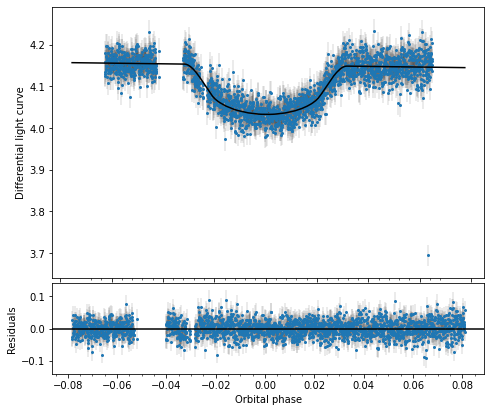

In [44]:
# Plot of the full transit, with the polynomial model

# Change these values according to your plot
plot_properties = {
    #'x_limits': [-0.165, 0.165],
    'x_limits': False,
    'y_limits': False,
    #'y_limits': [],
    'y_residual_limits': [-0.14, 0.14],
}


# We add in quadrature the jitter (last column of the file)
errors_val = np.sqrt(LC_modb[:,4]**2  + LC_modb[:,12]**2)


planet_list = ['b']

fig = plt.figure(figsize=(8,6))

ax_0, ax_1 = plots_in_grid()

ax_0.errorbar(transit_phase, LC_modb[:,3], yerr=errors_val, color='black', markersize=0, alpha=0.1, fmt='o', zorder=0)
ax_0.scatter(transit_phase, LC_modb[:,3], c='C0', s=4, zorder=1, label = 'TASTE data')

ax_0.plot(LC_modb_full[:,1],(LC_modb_full[:,3]+1.)*LC_poly_full[:,3], color='k', linestyle='-', zorder=2)

ax_1.errorbar(transit_phase, LC_modb[:,10], yerr=errors_val, color='black', markersize=0, alpha=0.1, fmt='o', zorder=1)

ax_1.scatter(transit_phase, LC_modb[:,10], c='C0', s=4, zorder=2)
ax_1.axhline(0.000, c='k', zorder=3)

#ax_0.legend( loc='lower left', fontsize='medium')

if plot_properties.get('x_limits', False):
    ax_0.set_xlim(plot_properties['x_limits'][0], plot_properties['x_limits'][1])
    ax_1.set_xlim(plot_properties['x_limits'][0], plot_properties['x_limits'][1])
if plot_properties.get('y_limits', False):
    ax_0.set_ylim(plot_properties['y_limits'][0], plot_properties['y_limits'][1])
if plot_properties.get('y_residual_limits', False):
    ax_1.set_ylim(plot_properties['y_residual_limits'][0], plot_properties['y_residual_limits'][1])

#ax_0.tick_params(axis='x', which='minor')
#ax_0.yaxis.set_tick_params(which='minor', right = 'off')
#ax_0.minorticks_on()

#ax_0.set_ylim(0.9898,1.0022)
ax_0.set_ylabel('Differential light curve')
ax_1.set_xlabel('Orbital phase')
ax_1.set_ylabel('Residuals')
#plt.savefig(filename+'.pdf', dpi=300, bbox_inches='tight')
plt.show()

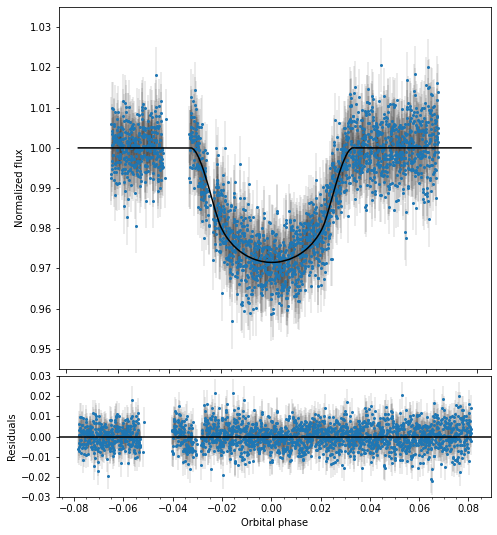

In [41]:
# proper calculation of residuals and error bars:
# residuals and errors are given by subtracting the full model 
# (normalized lightcurve multiplied for the polynomial trend)
# from the observations, NOT by dividing the observations for 
# the polynomial trend and then fitting the model. 
# So if we are comparing our data with the transit model alone 
# we have torescale the errors and the residuals manually

# With TESS data we didn't have to do this step because the 
# light curve has been normalized BEFORE the fit 

plot_properties = {
    #'x_limits': [-0.165, 0.165],
    'x_limits': False,
    'y_limits': [0.945, 1.035],
    'y_residual_limits': [-0.03, 0.03],
    #'y_residual_limits': None
}

# we add the jitter in quadrature and then divide by the polynomial value (as for the measurements)
errors_val = np.sqrt(LC_modb[:,4]**2  + LC_modb[:,12]**2) / LC_poly[:,3]

# we divide by the polynomial model in order to get the normalized residuals 
observations = LC_modb[:,3]/LC_poly[:,6]
residuals = LC_modb[:,10]/LC_poly[:,6]

fig = plt.figure(figsize=(8,8))

ax_0, ax_1 = plots_in_grid()

ax_0.errorbar(transit_phase, observations, yerr=errors_val, color='black', markersize=0, alpha=0.1, fmt='o', zorder=0)
ax_0.scatter(transit_phase, observations , c='C0', s=4, zorder=1, label = 'TASTE data')

ax_0.plot(LC_modb_full[:,1],LC_modb_full[:,3]+1., color='k', linestyle='-', zorder=2)

ax_1.errorbar(transit_phase, residuals, yerr=errors_val, color='black', markersize=0, alpha=0.1, fmt='o', zorder=1)

ax_1.scatter(transit_phase, residuals, c='C0', s=4, zorder=2)
ax_1.axhline(0.000, c='k', zorder=3)

#ax_0.legend( loc='lower left', fontsize='medium')

if plot_properties.get('x_limits', False):
    ax_0.set_xlim(plot_properties['x_limits'][0], plot_properties['x_limits'][1])
    ax_1.set_xlim(plot_properties['x_limits'][0], plot_properties['x_limits'][1])
if plot_properties.get('y_limits', False):
    ax_0.set_ylim(plot_properties['y_limits'][0], plot_properties['y_limits'][1])
if plot_properties.get('y_residual_limits', False):
    ax_1.set_ylim(plot_properties['y_residual_limits'][0], plot_properties['y_residual_limits'][1])

#ax_0.tick_params(axis='x', which='minor')
#ax_0.yaxis.set_tick_params(which='minor', right = 'off')
#ax_0.minorticks_on()

#ax_0.set_ylim(0.9898,1.0022)
ax_0.set_ylabel('Normalized flux')
ax_1.set_xlabel('Orbital phase')
ax_1.set_ylabel('Residuals')
#plt.savefig(filename+'.pdf', dpi=300, bbox_inches='tight')
plt.show()